In [1]:
pip install albumentations 

Note: you may need to restart the kernel to use updated packages.Collecting albumentations
     ---------------------------------------- 0.0/41.7 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.7 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 41.7/41.7 kB 507.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
     ----------------------------------- ---- 71.7/81.9 kB 2.0 MB/s eta 0:00:01
     ---------------------------------------- 81.9/81.9 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/67.4 kB ? eta -:--:--
     ------------------------------------ --- 61.4/67.4 kB 3.2 MB/s eta 0:00:01
     ---------------------------------------- 67.4/67.4 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/290.6 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/290.6 kB 3.6 MB/s eta 0:00:01
   ------------------------------- -------- 225.3/290.6 kB 2.8

In [8]:
import os
import cv2
import random
import numpy as np
from tqdm import tqdm
import torch.nn as nn
from typing import List
import albumentations as A
import torch.optim as optim
#from torchmetrics.image import DiceCoefficient
from torch.optim import RAdam
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
from torch.utils.data import Dataset, Subset
from albumentations.pytorch import ToTensorV2
from torchmetrics.segmentation import MeanIoU
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision.transforms.functional import to_tensor
from segmentation_models_pytorch.losses import DiceLoss
from torch.utils.data import Dataset, random_split, DataLoader
from albumentations import HorizontalFlip, VerticalFlip, RandomBrightnessContrast, Compose

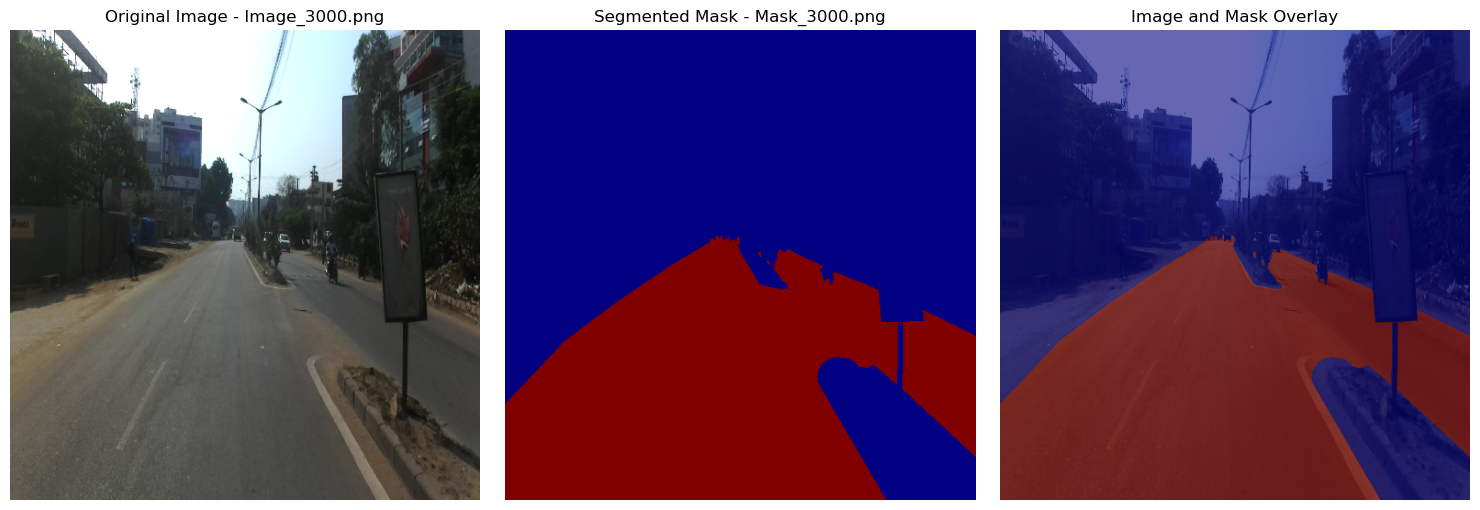

In [12]:
# Define directories for images and masks
image_folder = r'C:\Users\Sejal Hanmante\Downloads\archive\IDD_RESIZED\image_archive'
mask_folder = r'C:\Users\Sejal Hanmante\Downloads\archive\IDD_RESIZED\mask_archive'

# Retrieve lists of image and mask file names where each image has a 
# corresponding mask file named similarly (e.g., Image_0.png corresponds to Mask_0.png).
image_files = sorted(os.listdir(image_folder))  
mask_files = sorted(os.listdir(mask_folder))   

# Load the first image
image = cv2.imread(os.path.join(image_folder, image_files[50]), cv2.IMREAD_COLOR) 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load its corresponding mask
mask = cv2.imread(os.path.join(mask_folder, mask_files[50]), cv2.IMREAD_GRAYSCALE)

# Normalize the mask to span the full range of values
mask_normalized = cv2.normalize(mask, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply a color map to the mask for better visualization
mask_colored = cv2.applyColorMap(mask_normalized, cv2.COLORMAP_JET)
mask_colored_rgb = cv2.cvtColor(mask_colored, cv2.COLOR_BGR2RGB)

# Overlay the mask onto the image
alpha = 0.6
overlay = cv2.addWeighted(image_rgb, 1 - alpha, mask_colored_rgb, alpha, 0)

# Display the image and masks side by side
plt.figure(figsize=(15, 5)) 

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image - Image_3000.png")
plt.axis('off')

# Display the colored mask
plt.subplot(1, 3, 2)
plt.imshow(mask_colored_rgb)
plt.title("Segmented Mask - Mask_3000.png")
plt.axis('off')

# Display the overlay
plt.subplot(1, 3, 3)
plt.imshow(overlay)
plt.title("Image and Mask Overlay")
plt.axis('off')

plt.tight_layout()  
plt.show()
